In [43]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


In [44]:
import pandas as pd
import time
from datetime import datetime

Bitcoin = pd.read_csv('./Sourcecode/bitcoin_df.csv')
Bitcoin.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [45]:
df = Bitcoin[['Date', 'Close']]
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

C:\Users\ThinhDo\AppData\Local\Temp\ipykernel_21216\3839025817.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y,unique_id
0,2014-09-17,457.334015,1
1,2014-09-18,424.440002,1
2,2014-09-19,394.795990,1
3,2014-09-20,408.903992,1
4,2014-09-21,398.821014,1


In [46]:
print(df.dtypes)


ds            object
y            float64
unique_id     object
dtype: object


In [47]:
df["ds"] = pd.to_datetime(df["ds"])


C:\Users\ThinhDo\AppData\Local\Temp\ipykernel_21216\3986168344.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
df

,ds,y,unique_id
0,2014-09-17,457.334015,1
1,2014-09-18,424.440002,1
2,2014-09-19,394.795990,1
3,2014-09-20,408.903992,1
4,2014-09-21,398.821014,1
...,...,...,...
3566,2024-06-22,64252.578125,1
3567,2024-06-23,63180.796875,1
3568,2024-06-24,60277.414062,1
3569,2024-06-25,61804.640625,1


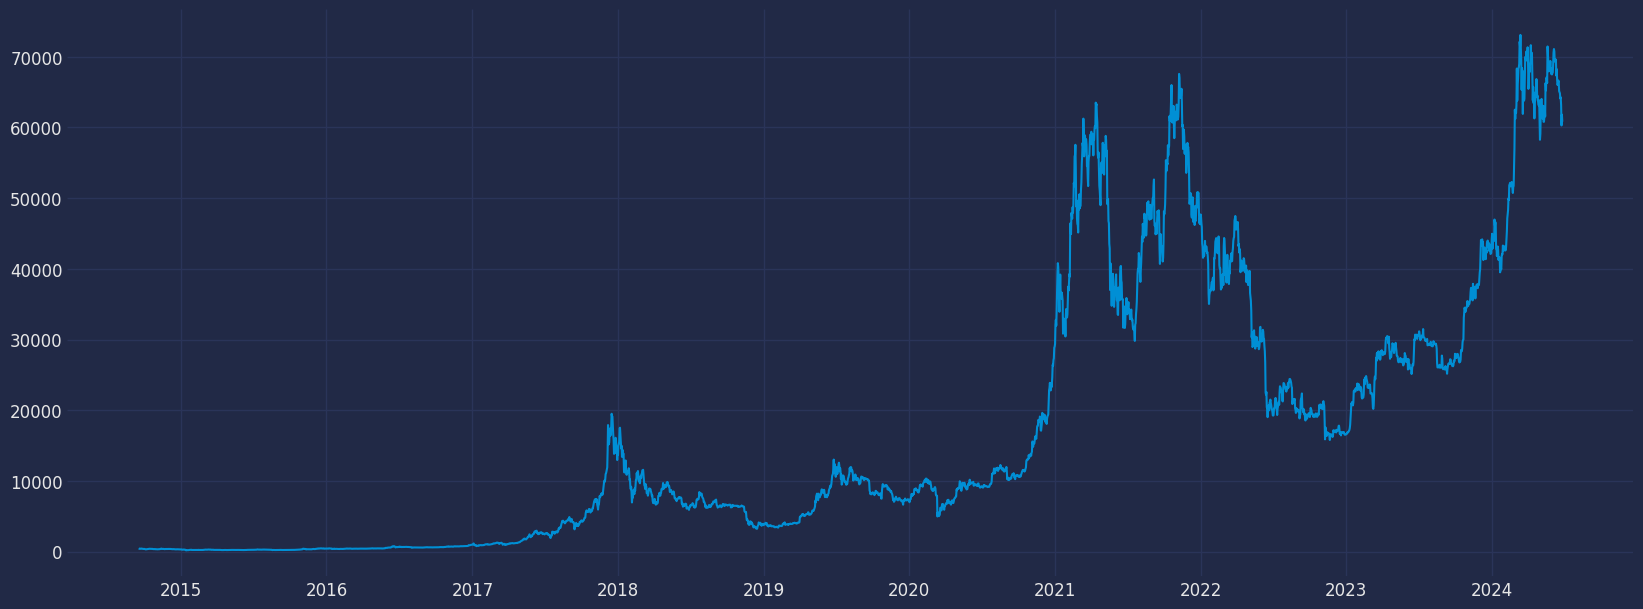

In [49]:
# plot data from df
plt.plot(df.ds, df.y)

In [50]:
from statsmodels.tsa.stattools import adfuller

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")


In [51]:
Augmented_Dickey_Fuller_Test_func(df["y"],'Bitcoin')


Dickey-Fuller test results for columns: Bitcoin
Test Statistic                   -1.082828
p-value                           0.721871
No Lags Used                     28.000000
Number of observations used    3542.000000
Critical Value (1%)              -3.432198
Critical Value (5%)              -2.862356
Critical Value (10%)             -2.567205
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


In [52]:
df['return'] = 100 * df["y"].pct_change()
df.dropna(inplace=True, how='any')
df.head()


C:\Users\ThinhDo\AppData\Local\Temp\ipykernel_21216\2979825504.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ThinhDo\AppData\Local\Temp\ipykernel_21216\2979825504.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y,unique_id,return
1,2014-09-18,424.440002,1,-7.192558
2,2014-09-19,394.795990,1,-6.984265
3,2014-09-20,408.903992,1,3.573492
4,2014-09-21,398.821014,1,-2.465854
5,2014-09-22,402.152008,1,0.835210


In [53]:
import plotly.express as px
fig = px.line(df, x=df["ds"], y="return",title="Bitcoin Return Chart",template = "plotly_dark")
fig


In [54]:
df['sq_return'] = df["return"].mul(df["return"])
df.head()


C:\Users\ThinhDo\AppData\Local\Temp\ipykernel_21216\1104504127.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y,unique_id,return,sq_return
1,2014-09-18,424.440002,1,-7.192558,51.732885
2,2014-09-19,394.795990,1,-6.984265,48.779951
3,2014-09-20,408.903992,1,3.573492,12.769843
4,2014-09-21,398.821014,1,-2.465854,6.080438
5,2014-09-22,402.152008,1,0.835210,0.697576


In [55]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(x=df["ds"], y=df["return"],
                         mode='lines',
                         name='return'),
row=1, col=1
)


fig.add_trace(go.Scatter(x=df["ds"], y=df["sq_return"],
                         mode='lines',
                         name='sq_return'), 
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Returns vs Squared Returns", template = "plotly_dark")
fig


In [56]:
from scipy.stats import probplot, moment
from statsmodels.tsa.stattools import adfuller, q_stat, acf
import numpy as np
import seaborn as sns

def plot_correlogram(x, lags=None, title=None):    
    lags = min(10, int(len(x)/5)) if lags is None else lags
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    x.plot(ax=axes[0][0], title='Return')
    x.rolling(21).mean().plot(ax=axes[0][0], c='k', lw=1)
    q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
    stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f}'
    axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
    probplot(x, plot=axes[0][1])
    mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
    s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
    axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
    plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0],auto_ylims=True)
    plot_pacf(x, lags=lags, zero=False, ax=axes[1][1],auto_ylims=True)
    axes[1][0].set_xlabel('Lag')
    axes[1][1].set_xlabel('Lag')
    fig.suptitle(title+ f'Dickey-Fuller: {adfuller(x)[1]:>11.2f}', fontsize=14)
    sns.despine()
    fig.tight_layout()
    fig.subplots_adjust(top=.9)


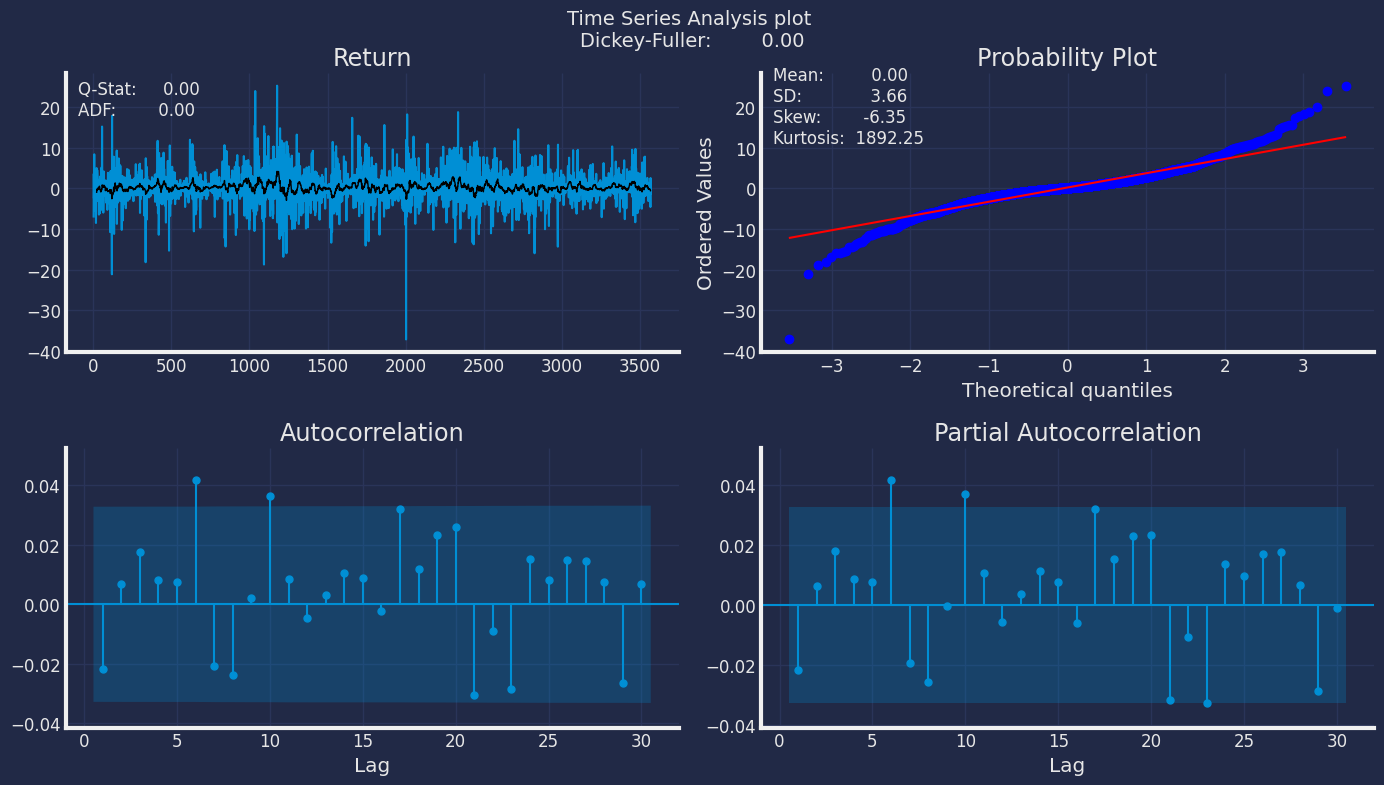

In [57]:
plot_correlogram(df["return"], lags=30, title="Time Series Analysis plot \n")


In [58]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_res = acorr_ljungbox(df["return"], lags= 40, boxpierce=True)

ljung_res.head()


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,1.705432,0.191579,1.703999,0.191766
2,1.871198,0.392351,1.869580,0.392668
3,2.989810,0.393199,2.986626,0.393692
4,3.223203,0.521191,3.219628,0.521767
5,3.422710,0.635113,3.418743,0.635717


In [59]:
df=df[["ds","unique_id","return"]]
df.columns=["ds", "unique_id", "y"]


In [60]:
train = df[df.ds<='2022-05-31'] # Let's forecast the last 30 days
test = df[df.ds>'2022-05-31']
test['unique_id'] = test['unique_id'].astype(int)
train['unique_id'] = train['unique_id'].astype(int)


C:\Users\ThinhDo\AppData\Local\Temp\ipykernel_21216\1448334756.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ThinhDo\AppData\Local\Temp\ipykernel_21216\1448334756.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
train.shape, test.shape


((2813, 3), (757, 3))

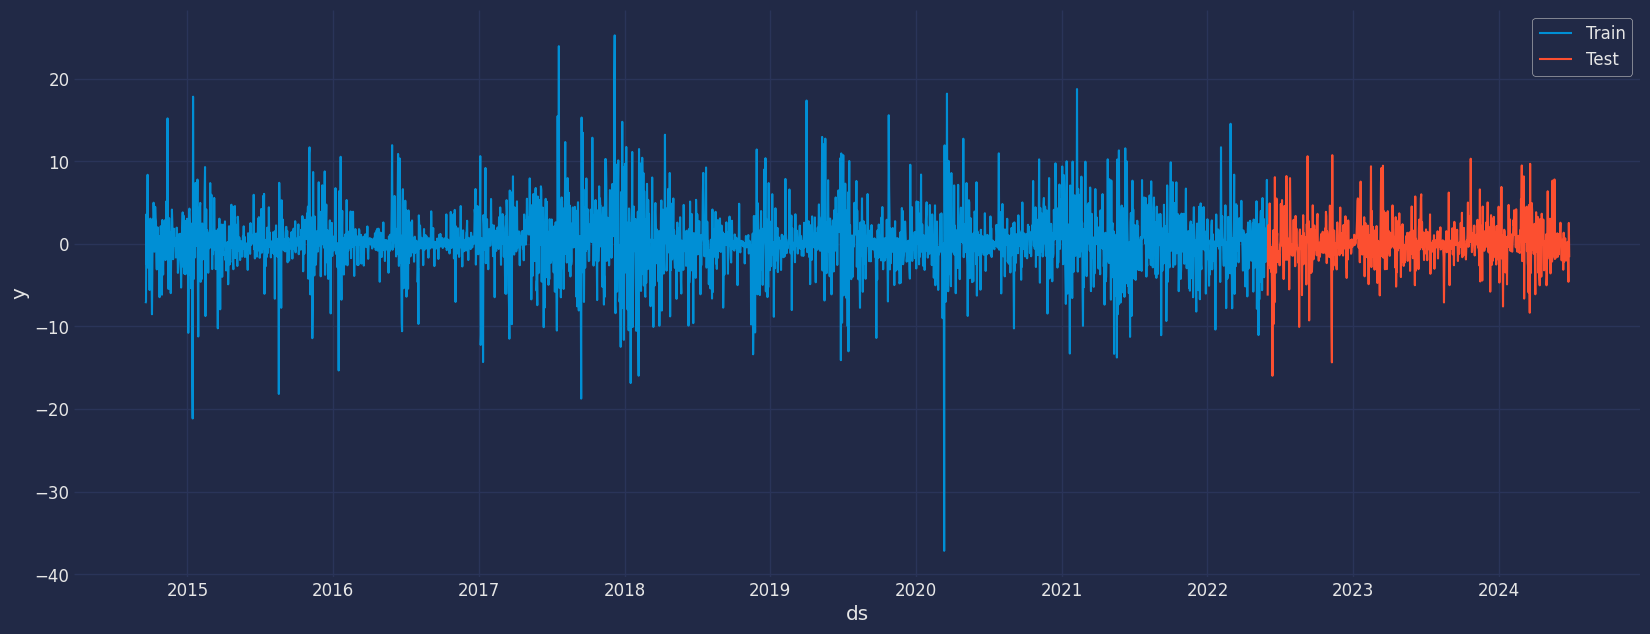

In [62]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
plt.show()


In [63]:
from statsforecast import StatsForecast 
from statsforecast.models import GARCH


In [64]:
season_length = 7 # Dayly data 
horizon = len(test) # number of predictions biasadj=True, include_drift=True,

models = [GARCH(1,1),
          GARCH(1,2),
          GARCH(2,2),
          GARCH(2,1),
          GARCH(3,1),
          GARCH(3,2),
          GARCH(3,3), 
          GARCH(1,3), 
          GARCH(2,3)]


In [65]:
sf = StatsForecast(df=train,
                   models=models,
                   freq='C', # custom business day frequency
                   n_jobs=-1)


c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:474: FutureWarning:

The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.



In [66]:
crossvalidation_df = sf.cross_validation(df=train,
                                         h=horizon,
                                         step_size=6,
                                         n_windows=5)


c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:492: FutureWarning:

In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.



In [67]:
crossvalidation_df


,ds,cutoff,y,"GARCH(1,1)","GARCH(1,2)","GARCH(2,2)","GARCH(2,1)","GARCH(3,1)","GARCH(3,2)","GARCH(3,3)","GARCH(1,3)","GARCH(2,3)"
unique_id,,,,,,,,,,,,
1,2020-04-11,2020-04-10,-0.093368,6.861375,7.138210,6.526005,6.844262,6.542705,6.564995,7.216699,7.639636,7.310674
1,2020-04-12,2020-04-10,1.632999,-2.908254,-3.018262,-2.917829,-2.908001,-2.637772,-2.645298,-3.088810,-3.298310,-3.153172
1,2020-04-13,2020-04-10,-1.808242,-2.386556,-2.384801,-2.364932,-2.392444,-2.302176,-2.303700,-2.331923,-2.327969,-2.357719
1,2020-04-14,2020-04-10,-0.038128,-4.579399,-4.632059,-4.595732,-4.586665,-4.768275,-4.774223,-4.592237,-4.598278,-4.551258
1,2020-04-15,2020-04-10,-2.927585,3.754274,3.846333,3.680394,3.757919,3.789430,3.791369,3.976732,4.122313,4.003206
...,...,...,...,...,...,...,...,...,...,...,...,...
1,2022-05-27,2020-05-04,-2.185552,5.107063,5.055344,5.072810,5.139703,4.990488,5.454956,4.937199,4.826365,4.953533
1,2022-05-28,2020-05-04,0.654356,-1.830328,-1.882112,-1.869513,-1.841126,-1.887752,-1.795003,-1.868133,-1.894665,-1.844970
1,2022-05-29,2020-05-04,2.190036,2.320273,2.301011,2.305512,2.335382,2.304909,2.522760,2.331089,2.314095,2.346603


In [68]:
from datasetsforecast.losses import rmse

def compute_cv_rmse(crossvalidation_df):
    """Compute MAE for all models generated"""
    res = {}
    for mod in models: 
        res[mod] = rmse(crossvalidation_df['actual'], crossvalidation_df[str(mod)])
    return pd.Series(res)


In [69]:
crossvalidation_df.rename(columns = {'y' : 'actual'}, inplace = True) # rename actual values 
rmse_cv = crossvalidation_df.groupby(['unique_id', 'cutoff']).apply(compute_cv_rmse)

mae = rmse_cv.groupby('unique_id').mean()
mae.style.highlight_min(color = 'red', axis = 1)


C:\Users\ThinhDo\AppData\Local\Temp\ipykernel_21216\51097994.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,"GARCH(1,1)","GARCH(1,2)","GARCH(2,2)","GARCH(2,1)","GARCH(3,1)","GARCH(3,2)","GARCH(3,3)","GARCH(1,3)","GARCH(2,3)"
unique_id,,,,,,,,,
1,5.648230,5.666106,5.693936,5.683455,5.738173,5.726335,5.641769,5.664828,5.634992


In [70]:
season_length = 7 # Dayly data 
horizon = len(test) # number of predictions biasadj=True, include_drift=True,

models = [GARCH(1,1)]


In [71]:
sf = StatsForecast(df=train,
                   models=models,
                   freq='C', # custom business day frequency
                   n_jobs=-1)



c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:474: FutureWarning:

The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.



In [72]:
sf.fit()


c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:474: FutureWarning:

The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.



StatsForecast(models=[GARCH(1,1)])

In [73]:
StatsForecast(models=[GARCH(1,1)],freq='C')


StatsForecast(models=[GARCH(1,1)])

In [74]:
result=sf.fitted_[0,0].model_
result


{'p': 1,
 'q': 1,
 'coeff': array([0.64585034, 0.1110285 , 0.85339167]),
 'message': 'Optimization terminated successfully',
 'y_vals': array([0.2077763]),
 'sigma2_vals': array([16.03827227]),
 'fitted': array([        nan,  7.11702443, -2.89824283, ..., -1.92398974,
         3.44698931, -0.11231577]),
 'actual_residuals': array([         nan, -14.10128894,   6.47173448, ...,   4.11402556,
          4.29748166,   0.32009207])}

In [75]:
residual=pd.DataFrame(result.get("actual_residuals"), columns=["residual Model"])
residual



,residual Model
0,NaN
1,-14.101289
2,6.471734
3,-0.032952
4,5.564554
...,...
2808,1.860027
2809,-1.645111
2810,4.114026
2811,4.297482


C:\Users\ThinhDo\AppData\Local\Temp\ipykernel_21216\3026330860.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




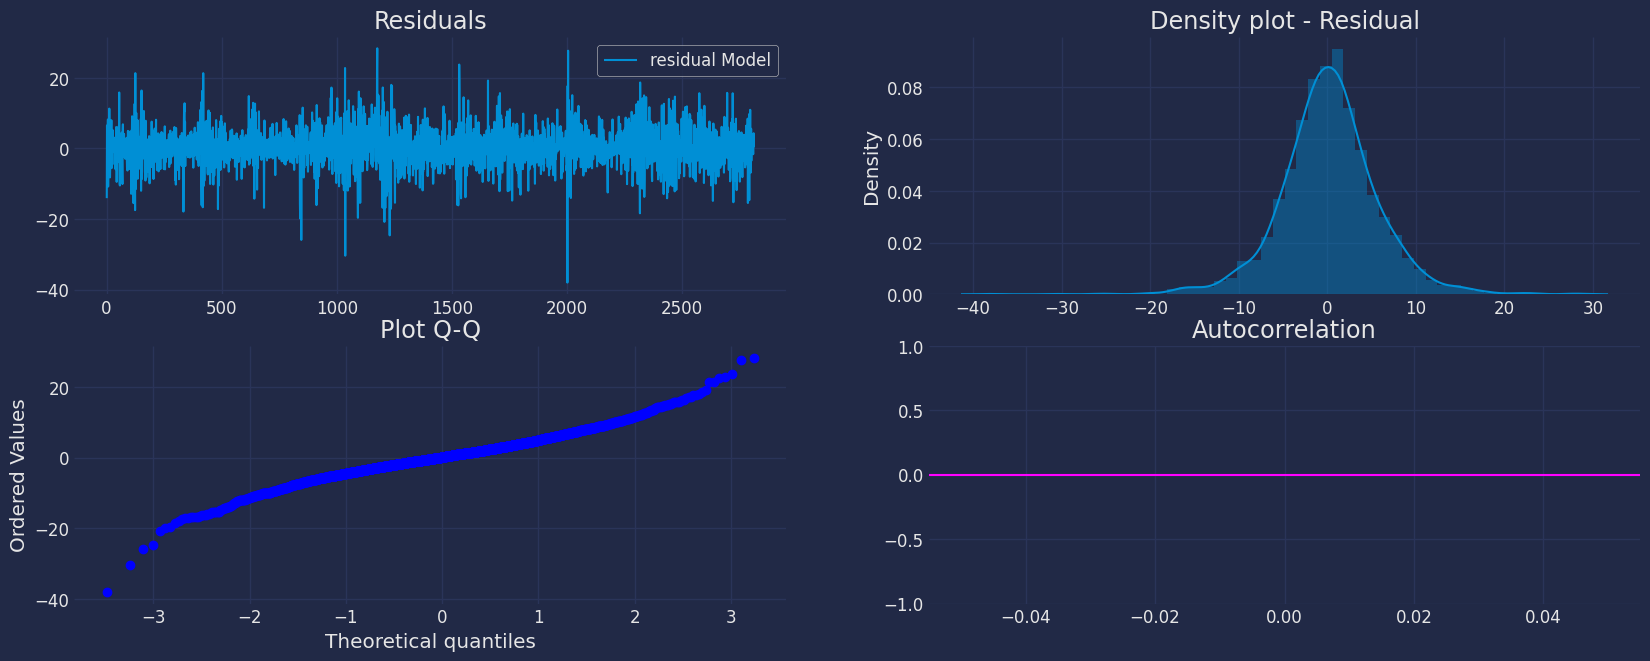

In [76]:
from scipy import stats

fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
residual.plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");

# plot
sns.distplot(residual, ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residual["residual Model"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residual,  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show()


In [77]:
Y_hat = sf.forecast(horizon, fitted=True)

Y_hat.head()


c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:474: FutureWarning:

The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:390: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs

,ds,"GARCH(1,1)"
unique_id,,
1,2022-06-01,6.150581
1,2022-06-02,-2.528382
1,2022-06-03,-2.108253
1,2022-06-06,-4.118907
1,2022-06-07,3.363461


In [78]:
Y_hat = sf.forecast(horizon, fitted=True, level=[95])

Y_hat.head()


c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:474: FutureWarning:

The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:390: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs

,ds,"GARCH(1,1)","GARCH(1,1)-lo-95","GARCH(1,1)-hi-95"
unique_id,,,,
1,2022-06-01,6.150581,-21.950542,34.251705
1,2022-06-02,-2.528382,-36.007671,30.950907
1,2022-06-03,-2.108253,-33.336174,29.119667
1,2022-06-06,-4.118907,-33.001621,24.763809
1,2022-06-07,3.363461,-26.242523,32.969444


In [79]:
values=sf.forecast_fitted_values()
values.head()


c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:492: FutureWarning:

In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.



,ds,y,"GARCH(1,1)","GARCH(1,1)-lo-95","GARCH(1,1)-hi-95"
unique_id,,,,,
1,2014-09-18,-7.192558,NaN,NaN,NaN
1,2014-09-19,-6.984264,7.117024,-3.634276,17.868324
1,2014-09-20,3.573492,-2.898243,-13.649543,7.853057
1,2014-09-21,-2.465854,-2.432902,-13.184202,8.318398
1,2014-09-22,0.835210,-4.729344,-15.480644,6.021956


In [80]:
sf.forecast(h=horizon, level=[95])


c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:474: FutureWarning:

The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:390: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs

,ds,"GARCH(1,1)","GARCH(1,1)-lo-95","GARCH(1,1)-hi-95"
unique_id,,,,
1,2022-06-01,6.150581,-21.950542,34.251705
1,2022-06-02,-2.528382,-36.007671,30.950907
1,2022-06-03,-2.108253,-33.336174,29.119667
1,2022-06-06,-4.118907,-33.001621,24.763809
1,2022-06-07,3.363461,-26.242523,32.969444
...,...,...,...,...
1,2025-04-18,5.035679,-24.667164,34.738522
1,2025-04-21,-1.777496,-33.909714,30.354723
1,2025-04-22,2.284253,-27.090500,31.659006


In [81]:
Y_hat=Y_hat.reset_index()
Y_hat.head()


,unique_id,ds,"GARCH(1,1)","GARCH(1,1)-lo-95","GARCH(1,1)-hi-95"
0,1,2022-06-01,6.150581,-21.950542,34.251705
1,1,2022-06-02,-2.528382,-36.007671,30.950907
2,1,2022-06-03,-2.108253,-33.336174,29.119667
3,1,2022-06-06,-4.118907,-33.001621,24.763809
4,1,2022-06-07,3.363461,-26.242523,32.969444


In [82]:
# Merge the forecasts with the true values
test['unique_id'] = test['unique_id'].astype(int)

# Set the index to ['unique_id', 'ds'] for both data frames
test.set_index(['unique_id', 'ds'], inplace=True)
Y_hat.set_index(['unique_id', 'ds'], inplace=True)

# Concatenate the data frames along the columns
Y_hat1 = pd.concat([test, Y_hat], axis=1)

# Reset the index if you want to return to the original format
Y_hat1.reset_index(inplace=True)

Y_hat1


C:\Users\ThinhDo\AppData\Local\Temp\ipykernel_21216\541786349.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,unique_id,ds,y,"GARCH(1,1)","GARCH(1,1)-lo-95","GARCH(1,1)-hi-95"
0,1,2022-06-01,-6.269536,6.150581,-21.950542,34.251705
1,1,2022-06-02,2.243050,-2.528382,-36.007671,30.950907
2,1,2022-06-03,-2.504629,-2.108253,-33.336174,29.119667
3,1,2022-06-04,0.432675,NaN,NaN,NaN
4,1,2022-06-05,0.247204,NaN,NaN,NaN
...,...,...,...,...,...,...
968,1,2025-04-18,NaN,5.035679,-24.667164,34.738522
969,1,2025-04-21,NaN,-1.777496,-33.909714,30.354723
970,1,2025-04-22,NaN,2.284253,-27.090500,31.659006
971,1,2025-04-23,NaN,-2.543409,-30.012880,24.926062


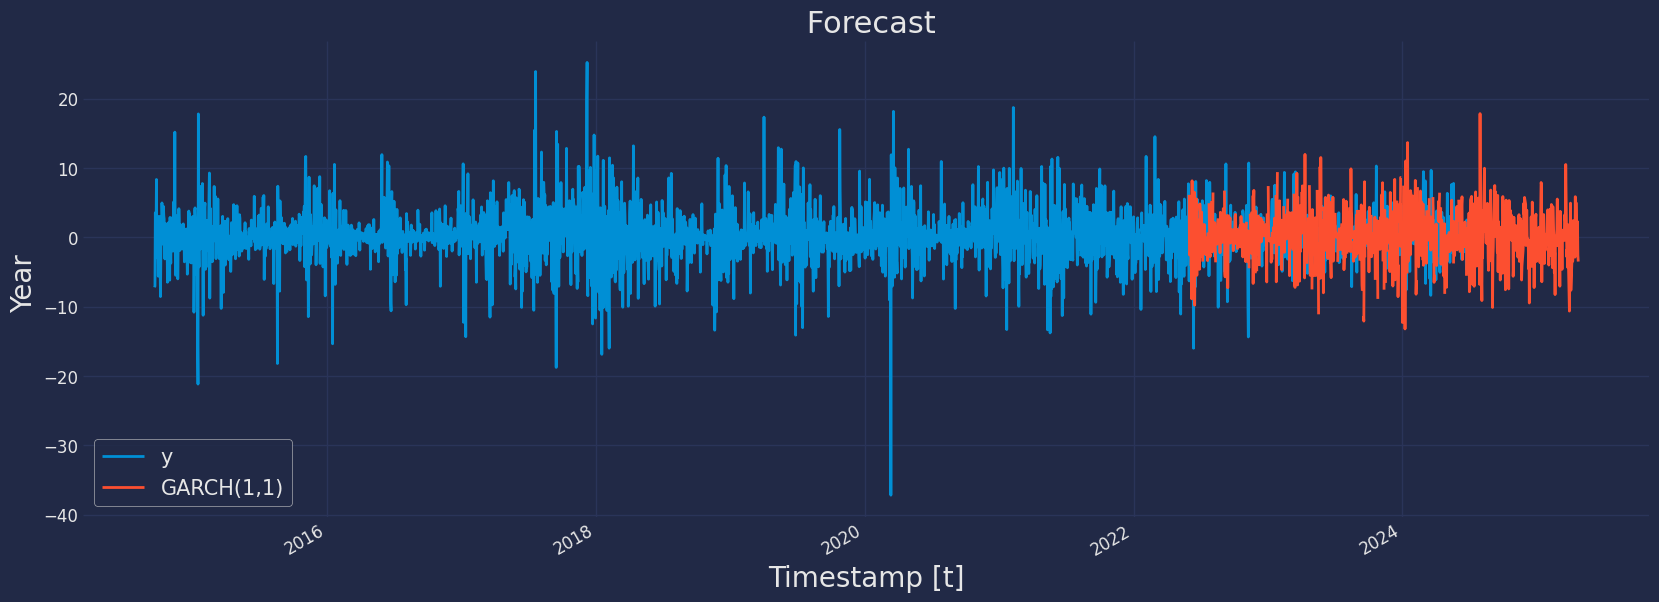

In [83]:
fig, ax = plt.subplots(1, 1)
plot_df = pd.concat([train, Y_hat1]).set_index('ds')
plot_df[['y', "GARCH(1,1)"]].plot(ax=ax, linewidth=2)
ax.set_title(' Forecast', fontsize=22)
ax.set_ylabel('Year ', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid(True)
plt.show()


In [84]:
plot_df

,unique_id,y,"GARCH(1,1)","GARCH(1,1)-lo-95","GARCH(1,1)-hi-95"
ds,,,,,
2014-09-18,1,-7.192558,NaN,NaN,NaN
2014-09-19,1,-6.984265,NaN,NaN,NaN
2014-09-20,1,3.573492,NaN,NaN,NaN
2014-09-21,1,-2.465854,NaN,NaN,NaN
2014-09-22,1,0.835210,NaN,NaN,NaN
...,...,...,...,...,...
2025-04-18,1,NaN,5.035679,-24.667164,34.738522
2025-04-21,1,NaN,-1.777496,-33.909714,30.354723
2025-04-22,1,NaN,2.284253,-27.090500,31.659006


In [85]:
sf.predict(h=horizon)


c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:390: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\T

,ds,"GARCH(1,1)"
unique_id,,
1,2022-06-01,6.150581
1,2022-06-02,-2.528382
1,2022-06-03,-2.108253
1,2022-06-06,-4.118907
1,2022-06-07,3.363461
...,...,...
1,2025-04-18,5.035679
1,2025-04-21,-1.777496
1,2025-04-22,2.284253


In [86]:
forecast_df = sf.predict(h=horizon, level=[80,95])

forecast_df.head(10)


c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:390: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\ThinhDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\utilsforecast\processing.py:439: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\T

,ds,"GARCH(1,1)","GARCH(1,1)-lo-95","GARCH(1,1)-lo-80","GARCH(1,1)-hi-80","GARCH(1,1)-hi-95"
unique_id,,,,,,
1,2022-06-01,6.150581,-21.950542,-12.223756,24.524920,34.251705
1,2022-06-02,-2.528382,-36.007671,-24.419312,19.362549,30.950907
1,2022-06-03,-2.108253,-33.336174,-22.527092,18.310587,29.119667
1,2022-06-06,-4.118907,-33.001621,-23.004299,14.766486,24.763809
1,2022-06-07,3.363461,-26.242523,-15.994851,22.721773,32.969444
1,2022-06-08,-8.852012,-37.845169,-27.809620,10.105595,20.141146
1,2022-06-09,8.178274,-34.881744,-19.977160,36.333706,51.238293
1,2022-06-10,-3.942195,-56.509888,-38.314362,30.429970,48.625496
1,2022-06-13,1.603467,-47.905090,-30.768438,33.975372,51.112026


In [87]:

forecast_df.reset_index(inplace=True)
train.reset_index(inplace=True)

In [88]:
# index by row for forecast_df
df_plot=pd.concat([df, forecast_df]).set_index('ds')
train.set_index('ds', inplace=True)


In [98]:
def plot_forecasts(y_hist, y_true, models):
    _, ax = plt.subplots(1, 1, figsize = (20, 7))
    df_plot = pd.concat([y_hist, y_true])
    #chỉ lấy 300 dòng cuối cùng trong df_plot
    df_plot = df_plot.tail(1000)
    df_plot[['y'] + models].plot(ax=ax, linewidth=2 )
    colors = ['green']
  # Specify graph features:
    ax.fill_between(df_plot.index, 
                df_plot['GARCH(1,1)-lo-80'], 
                df_plot['GARCH(1,1)-hi-80'],
                alpha=.20,
                color='lime',
                label='GARCH(1,1)_level_80')
    ax.fill_between(df_plot.index, 
                df_plot['GARCH(1,1)-lo-95'], 
                df_plot['GARCH(1,1)-hi-95'],
                alpha=.2,
                color='white',
                label='GARCH(1,1)_level_95')
    ax.set_title('', fontsize=22)
    ax.set_ylabel("Return", fontsize=20)
    ax.set_xlabel('Month-Days', fontsize=20)
    ax.legend(prop={'size': 15})
    ax.grid(True)
    plt.show()


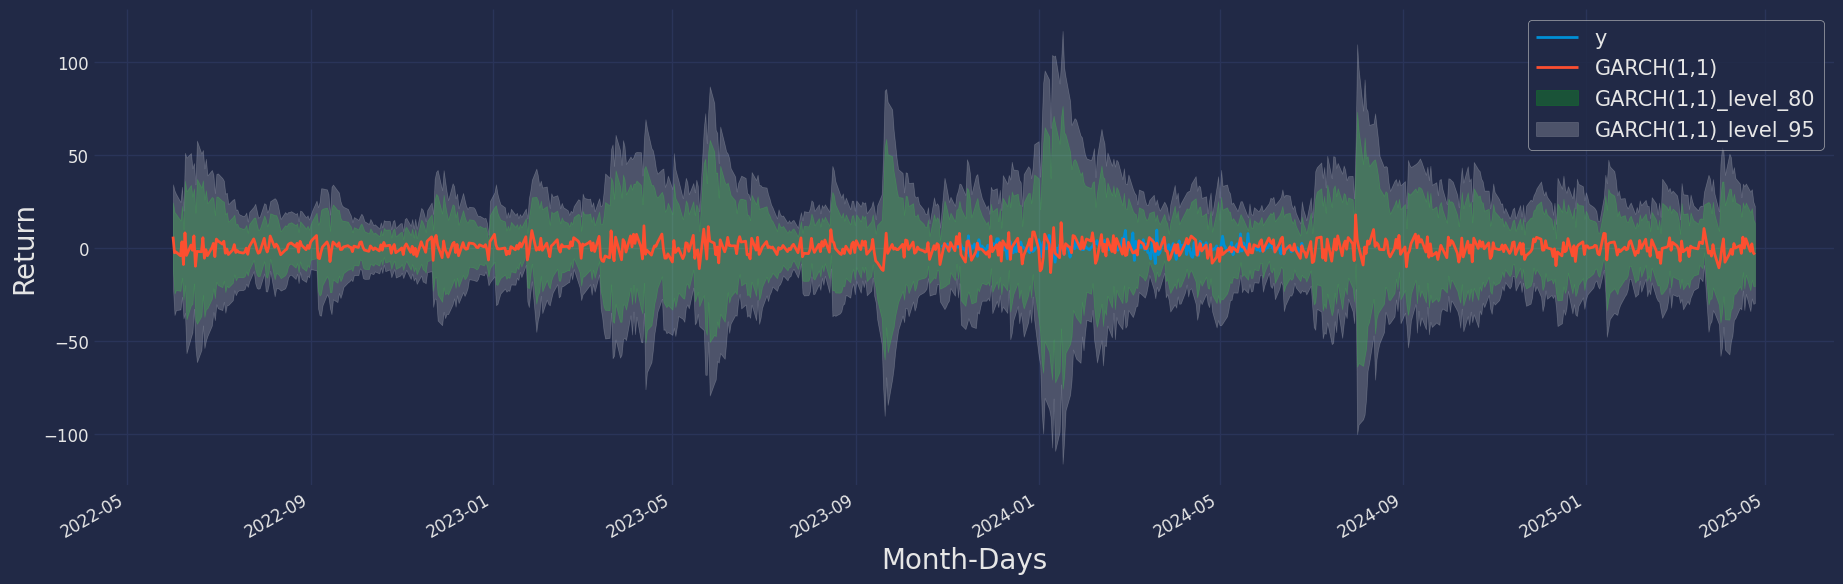

In [99]:
plot_forecasts(train, df_plot, models=["GARCH(1,1)" ])


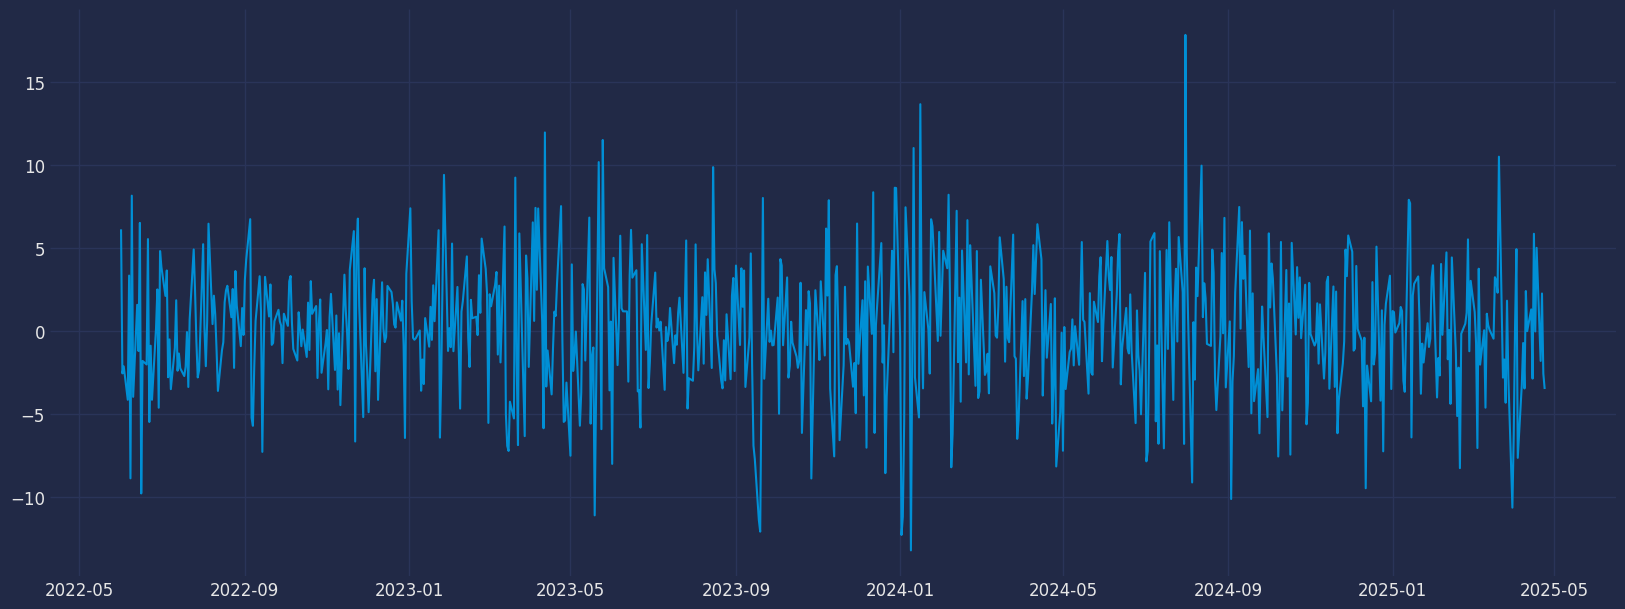

In [91]:
# plot data forecast_df
plt.plot(forecast_df.ds, forecast_df["GARCH(1,1)"])
plt.show()

In [92]:
from datasetsforecast.losses import mae, mape, mase, rmse, smape
def evaluate_performace(y_hist, y_true, y_pred, model):
    y_true = y_true.merge(y_pred, how='left', on=['unique_id', 'ds'])
    evaluation = {}
    evaluation[model] = {}
    for metric in [mae, mape, rmse, smape]:
        metric_name = metric.__name__
        if metric_name =='mase':
            evaluation[model][metric_name] = metric(y_true['y'].values, 
                                                y_true[model].values, 
                                                y_hist['y'].values, seasonality=7)
        else:
            evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T
evaluate_performace(train, test, Y_hat, model="GARCH(1,1)")


,mae,mape,rmse,smape
"GARCH(1,1)",3.916997,453.046117,4.988649,107.480062
